# Decision Trees

Working through tons of sci-kit learn models with the Titanic Dataset. This notebook will explore section 1.10 from the [scikit learn user guide](https://scikit-learn.org/stable/modules/tree.html)

In [1]:
# Set read-in-data variables

embarked = 'integers-zero'
age = 'baby-zero-other-avg'
sex = 'integer'
fare = 'integer-floor'

# Store variables to pass to other notebook

%store embarked
%store age
%store sex
%store fare

# Run read-in-data notebook

%run ./read-in-data.ipynb

# Read in evaluate predictions methods

%run ./evaluate-predictions.ipynb

%store -r

Stored 'embarked' (str)
Stored 'age' (str)
Stored 'sex' (str)
Stored 'fare' (str)
Stored 'X_train' (DataFrame)
Stored 'X_validate' (DataFrame)
Stored 'y_train' (DataFrame)
Stored 'y_validate' (DataFrame)
Stored 'X_test' (DataFrame)


## Results Table 

It seems wise to track each model's performance on a table, let's define one up top.

In [2]:
results = pd.DataFrame(columns=["AUC","BestAccuracy","BestThreshold"])

## Decision Tree Classifier

Decision trees are a non-parametric supervised learning method for classification and regression. Createa model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

Let's start simple, with a basic DecisionTreeClassifier

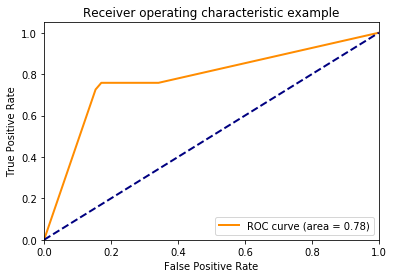

                            AUC  BestAccuracy  BestThreshold
Decision Tree Classifier  0.777         0.804            0.5


In [16]:
from sklearn import tree

# Fit a tree
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

# Predict probabilities from the tree: 
y_predict = clf.predict_proba(X_validate)

# Evaluate
# the tree has created the probability of each class, so y_predict is a 2-d array.
# we want every row and the second column (probability of survival), so that's y_predict[:,1]

clf_results = evaluate_predicted_probabilities(y_predict[:,1], y_validate['Survived'])

results = results.append(pd.DataFrame(
        [[np.round(clf_results[0], 3), np.round(clf_results[1], 3), clf_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Decision Tree Classifier"]))
print(results)

## Random Forest

We don't want to fixate too much on one parameter, so sometimes mixing it up is special. Here's a random forest classifier

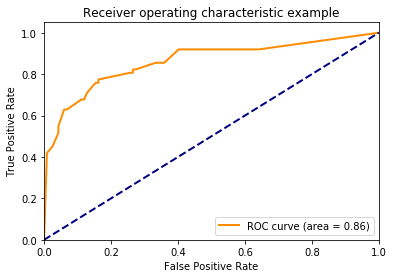

                            AUC  BestAccuracy  BestThreshold
Decision Tree Classifier  0.777         0.804           0.50
Random Forest Classifier  0.862         0.849           0.50
Random Forest Classifier  0.861         0.832           0.75


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Fit a tree
rfc = RandomForestClassifier().fit(X_train, np.ravel(y_train))

# Predict probabilities from the tree: 
y_predict = rfc.predict_proba(X_validate)

# Evaluate
# the tree has created the probability of each class, so y_predict is a 2-d array.
# we want every row and the second column (probability of survival), so that's y_predict[:,1]

rfc_results = evaluate_predicted_probabilities(y_predict[:,1], y_validate['Survived'])

results = results.append(pd.DataFrame(
        [[np.round(rfc_results[0], 3), np.round(rfc_results[1], 3), rfc_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Random Forest Classifier"]))
print(results)

In [20]:
print(rfc.feature_importances_)

[0.06636866 0.23334454 0.2981937  0.07178054 0.05139199 0.23651581
 0.04240477]


# AdaBoost Classifier 

It's fancy. Let's try it. 

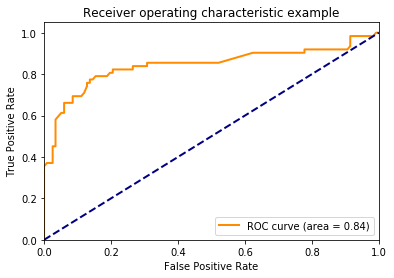

                            AUC  BestAccuracy  BestThreshold
Decision Tree Classifier  0.777         0.804           0.50
Random Forest Classifier  0.862         0.849           0.50
Random Forest Classifier  0.861         0.832           0.75
AdaBoost Classifier       0.843         0.827           0.50


In [23]:
from sklearn.ensemble import AdaBoostClassifier

# Fit a tree
ada = AdaBoostClassifier().fit(X_train, np.ravel(y_train))

# Predict probabilities from the tree: 
y_predict = ada.predict_proba(X_validate)

# Evaluate
# the tree has created the probability of each class, so y_predict is a 2-d array.
# we want every row and the second column (probability of survival), so that's y_predict[:,1]

ada_results = evaluate_predicted_probabilities(y_predict[:,1], y_validate['Survived'])

results = results.append(pd.DataFrame(
        [[np.round(ada_results[0], 3), np.round(ada_results[1], 3), ada_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["AdaBoost Classifier"]))

print(results)

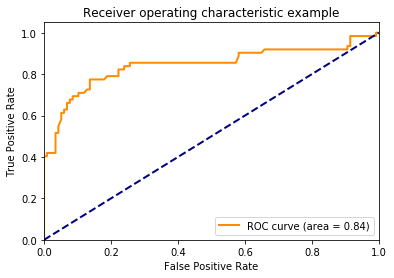

                                         AUC  BestAccuracy  BestThreshold
Decision Tree Classifier               0.777         0.804           0.50
Random Forest Classifier               0.862         0.849           0.50
Random Forest Classifier               0.861         0.832           0.75
AdaBoost Classifier                    0.843         0.827           0.50
AdaBoost Classifier w/ 500 estimators  0.844         0.810           0.50


In [24]:
# Let's try with more estimators 
# Fit a tree
ada_500 = AdaBoostClassifier(n_estimators = 500).fit(X_train, np.ravel(y_train))

# Predict probabilities from the tree: 
y_predict = ada_500.predict_proba(X_validate)

# Evaluate
# the tree has created the probability of each class, so y_predict is a 2-d array.
# we want every row and the second column (probability of survival), so that's y_predict[:,1]

ada_500_results = evaluate_predicted_probabilities(y_predict[:,1], y_validate['Survived'])

results = results.append(pd.DataFrame(
        [[np.round(ada_500_results[0], 3), np.round(ada_500_results[1], 3), ada_500_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["AdaBoost Classifier w/ 500 estimators"]))
print(results)

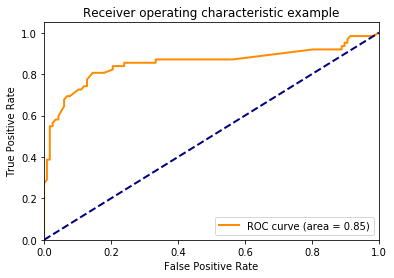

                                           AUC  BestAccuracy  BestThreshold
Decision Tree Classifier                 0.777         0.804           0.50
Random Forest Classifier                 0.862         0.849           0.50
Random Forest Classifier                 0.861         0.832           0.75
AdaBoost Classifier                      0.843         0.827           0.50
AdaBoost Classifier w/ 500 estimators    0.844         0.810           0.50
AdaBoost Classifier w/ .5 learning rate  0.853         0.838           0.50


In [25]:
# No bueno, apparently, this dataset doesn't need anymore estimators. What if we slow the learning rate? 

# Fit a tree
ada_slow = AdaBoostClassifier(learning_rate = 0.5).fit(X_train, np.ravel(y_train))

# Predict probabilities from the tree: 
y_predict = ada_slow.predict_proba(X_validate)

# Evaluate
# the tree has created the probability of each class, so y_predict is a 2-d array.
# we want every row and the second column (probability of survival), so that's y_predict[:,1]

ada_slow_results = evaluate_predicted_probabilities(y_predict[:,1], y_validate['Survived'])

results = results.append(pd.DataFrame(
        [[np.round(ada_slow_results[0], 3), np.round(ada_slow_results[1], 3), ada_slow_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["AdaBoost Classifier w/ .5 learning rate"]))
print(results)

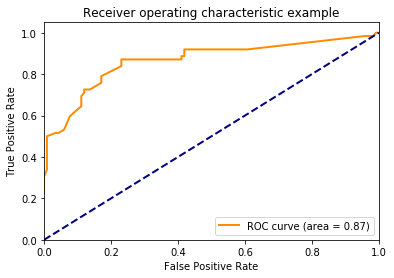

                                           AUC  BestAccuracy  BestThreshold
Decision Tree Classifier                 0.777         0.804           0.50
Random Forest Classifier                 0.862         0.849           0.50
Random Forest Classifier                 0.861         0.832           0.75
AdaBoost Classifier                      0.843         0.827           0.50
AdaBoost Classifier w/ 500 estimators    0.844         0.810           0.50
AdaBoost Classifier w/ .5 learning rate  0.853         0.838           0.50
AdaBoost Classifier w/ .1 learning rate  0.865         0.827           0.48


In [26]:
# Slight improvement, what if we slow the learning rate even more?

# Fit a tree
ada_slower = AdaBoostClassifier(learning_rate = 0.1).fit(X_train, np.ravel(y_train))

# Predict probabilities from the tree: 
y_predict = ada_slower.predict_proba(X_validate)

# Evaluate
# the tree has created the probability of each class, so y_predict is a 2-d array.
# we want every row and the second column (probability of survival), so that's y_predict[:,1]

ada_slower_results = evaluate_predicted_probabilities(y_predict[:,1], y_validate['Survived'])

results = results.append(pd.DataFrame(
        [[np.round(ada_slower_results[0], 3), np.round(ada_slower_results[1], 3), ada_slower_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["AdaBoost Classifier w/ .1 learning rate"]))
print(results)

## Gradient Boosting Trees

Should read up more here, shouldn't I?

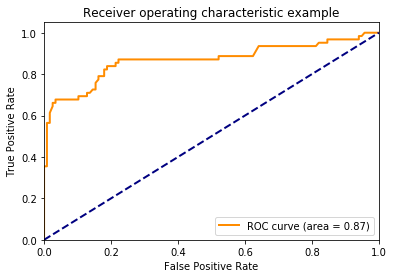

                                           AUC  BestAccuracy  BestThreshold
Decision Tree Classifier                 0.777         0.804           0.50
Random Forest Classifier                 0.862         0.849           0.50
Random Forest Classifier                 0.861         0.832           0.75
AdaBoost Classifier                      0.843         0.827           0.50
AdaBoost Classifier w/ 500 estimators    0.844         0.810           0.50
AdaBoost Classifier w/ .5 learning rate  0.853         0.838           0.50
AdaBoost Classifier w/ .1 learning rate  0.865         0.827           0.48
Gradient Boosting Trees                  0.867         0.866           0.63


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit a tree
gbt = GradientBoostingClassifier().fit(X_train, np.ravel(y_train))

# Predict probabilities from the tree: 
y_predict = gbt.predict_proba(X_validate)

# Evaluate
# the tree has created the probability of each class, so y_predict is a 2-d array.
# we want every row and the second column (probability of survival), so that's y_predict[:,1]

gbt_results = evaluate_predicted_probabilities(y_predict[:,1], y_validate['Survived'])

results = results.append(pd.DataFrame(
        [[np.round(gbt_results[0], 3), np.round(gbt_results[1], 3), gbt_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Gradient Boosting Trees"]))
print(results)

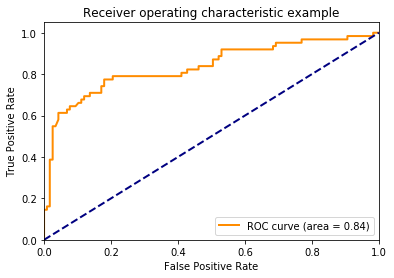

                                            AUC  BestAccuracy  BestThreshold
Decision Tree Classifier                  0.777         0.804           0.50
Random Forest Classifier                  0.862         0.849           0.50
Random Forest Classifier                  0.861         0.832           0.75
AdaBoost Classifier                       0.843         0.827           0.50
AdaBoost Classifier w/ 500 estimators     0.844         0.810           0.50
AdaBoost Classifier w/ .5 learning rate   0.853         0.838           0.50
AdaBoost Classifier w/ .1 learning rate   0.865         0.827           0.48
Gradient Boosting Trees                   0.867         0.866           0.63
Gradient Boosting Trees, 1000 estimators  0.837         0.832           0.88


In [28]:
# Per scikit-learn user's guide: "Gradient boosting is fairly robust to 
# over-fitting so a large number usually results in better performance."
# Default was 100, what about a ten fold increase? 

# Fit a tree
gbt_10x = GradientBoostingClassifier(n_estimators=1000).fit(X_train, np.ravel(y_train))

# Predict probabilities from the tree: 
y_predict = gbt_10x.predict_proba(X_validate)

# Evaluate
# the tree has created the probability of each class, so y_predict is a 2-d array.
# we want every row and the second column (probability of survival), so that's y_predict[:,1]

gbt_10x_results = evaluate_predicted_probabilities(y_predict[:,1], y_validate['Survived'])

results = results.append(pd.DataFrame(
        [[np.round(gbt_10x_results[0], 3), np.round(gbt_10x_results[1], 3), gbt_10x_results[2]]], 
        columns=["AUC","BestAccuracy","BestThreshold"], 
        index=["Gradient Boosting Trees, 1000 estimators"]))
print(results)

# Make Submission

Looks like Gradient Boosting Trees got the best result, let's make a submission. 

In [30]:
# Train model again, for fun
gbt = GradientBoostingClassifier().fit(X_train, np.ravel(y_train))

# Create copy of  X_test
gbt_submission = X_test.copy(deep=True)

# Copy probabilities to ridge_submission
gbt_submission['Survived_p'] = gbt.predict(X_test)

# Apply threshold
gbt_submission['Survived'] = gbt_submission.apply(lambda row: 1 if row.Survived_p >= 0.63 else 0, axis = 1)

# Write to .csv file
gbt_submission[['Survived']].to_csv(path_or_buf="data/gbt.csv", 
                        index=True, 
                        header=True )

In [31]:
# Oh man, GBT wasn't an improvement! Let's try the next best, the random forest classifier

# Train model again, for fun
rfc = RandomForestClassifier().fit(X_train, np.ravel(y_train))

# Create copy of  X_test
rfc_submission = X_test.copy(deep=True)

# Copy probabilities to ridge_submission
rfc_submission['Survived_p'] = rfc.predict(X_test)

# Apply threshold
rfc_submission['Survived'] = rfc_submission.apply(lambda row: 1 if row.Survived_p >= 0.50 else 0, axis = 1)

# Write to .csv file
rfc_submission[['Survived']].to_csv(path_or_buf="data/rfc.csv", 
                        index=True, 
                        header=True )